In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_generator import DataGenerator
np.random.seed(42)


# Linear Regression 1 Feature


Actual: 2 5
Approximated:  1.89 5.1


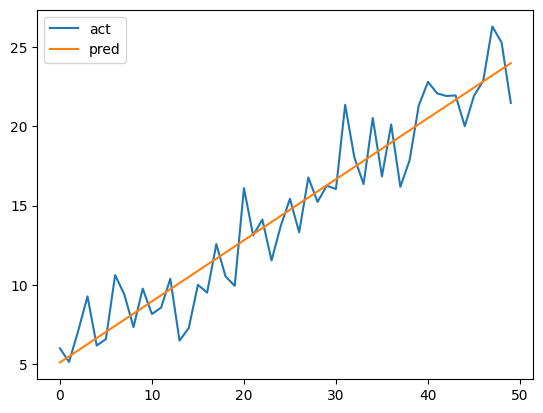

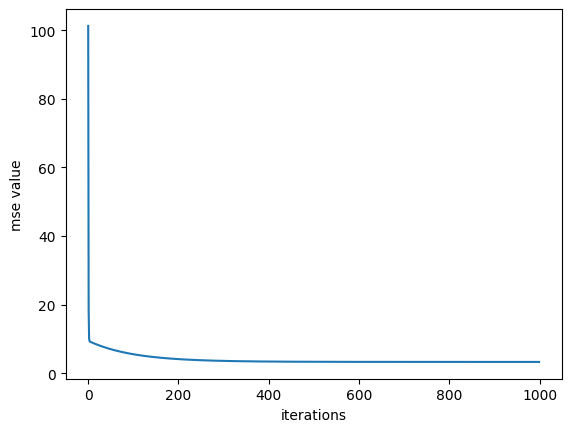

In [2]:
# Parameters
num_points = 50  # Number of data points
slope_actual = 2         # Actual slope of the line
intercept_actual = 5     # Actual intercept of the line
noise_std = 2     # Standard deviation of the noise



x = np.linspace(0, 10, num_points)  # X
linear_data = slope_actual * x + intercept_actual

noise = np.random.normal(loc=0, scale=noise_std, size=num_points)  
data_with_noise = linear_data + noise  # y

m = 1  # slope
c = 0 # intercept

lr = 0.01
max_iter = 1000
mse_log = []

for iter in range(max_iter):
    y_predict = m * x + c
    error = y_predict - data_with_noise
    dm = (2/num_points) * np.sum(error * x)
    dc = (2/num_points) * np.sum(error)   
    m -= lr * dm
    c -= lr * dc
    mse = np.sum(error**2)/num_points # mean square error
    mse_log.append(mse)
    
print(f"Actual:", slope_actual, intercept_actual)
print("Approximated: ", round(m,2), round(c,2))
plt.plot(data_with_noise,label='act')
plt.plot(y_predict, label ='pred')

plt.legend()
plt.show()

plt.plot(mse_log)
plt.xlabel("iterations")
plt.ylabel("mse value")
plt.show()

# Linear Regression N-D: (N feature)


In [3]:
num_points = 100
num_features = 1 # higher, the better it knows (from the X in real case)
noise_std = 0

# creating random data
x = np.random.rand(num_points,num_features)
w_actual = np.ones(num_features)
# w_actual = np.zeros(num_features)
# w_actual= np.array([i for i in range(num_features)])
b_actual = 1
noise = np.random.normal(loc=0, scale=noise_std, size=num_points)
y = np.dot(x, w_actual) + b_actual + noise


# # creating linear data
# num_features = 1
# x = np.linspace(0, 10, num_points)  # X
# linear_data = slope_actual * x + intercept_actual
# noise = np.random.normal(loc=0, scale=noise_std, size=num_points)  
# y = linear_data + noise  # y
# x = np.reshape(x,(x.shape[0],1))

print(x.shape)

(100, 1)


In [4]:
w = np.ones(num_features)
b = np.random.randint(0,100)/100
print(w.shape)

(1,)


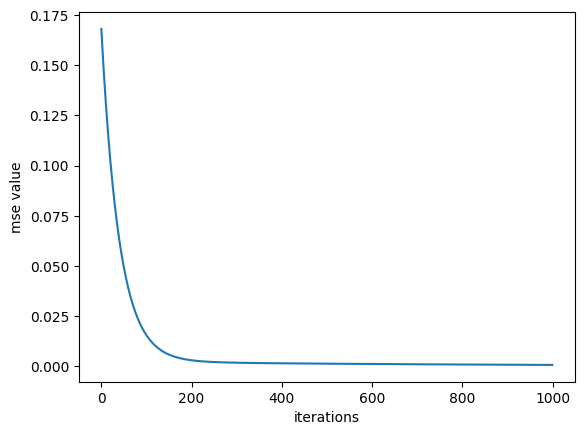

Final mean square error: 0.0006289197559599237


In [5]:
lr = 0.01
max_iter = 1000
mse_log = []
for iter in range(max_iter):
    y_predict = np.dot(x,w) + b
    error = y_predict - y
    dw = (1/num_points) * np.dot(x.T, error)
    db = (1/num_points) * np.sum(error)
    w -= lr * dw
    b -= lr * db

    mse = np.sum(error**2)/num_points # mean square error
    mse_log.append(mse)

plt.plot(mse_log)
plt.xlabel("iterations")
plt.ylabel("mse value")
plt.show()
print("Final mean square error:", mse)

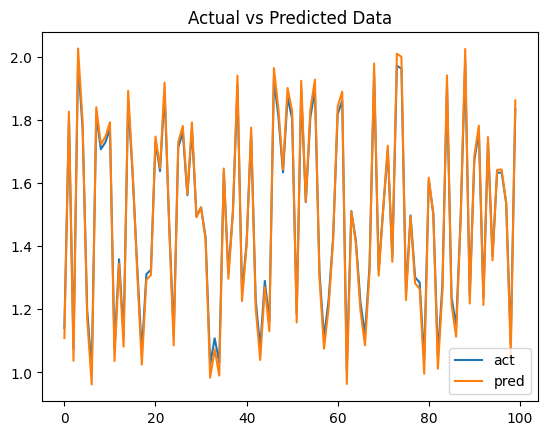

In [6]:
plt.plot(y,label='act')
plt.plot(y_predict, label ='pred')
plt.title("Actual vs Predicted Data")
plt.legend()
plt.show()

# With DataGenerator

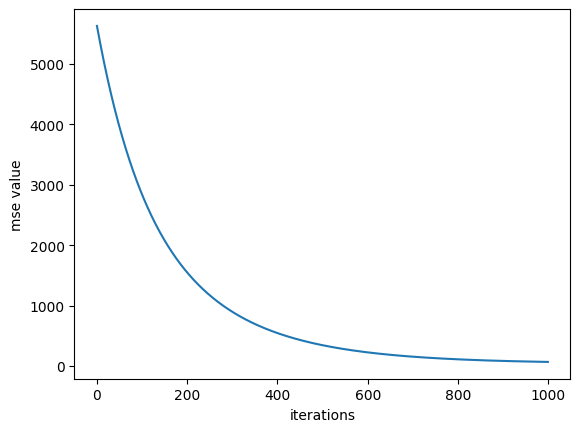

Final mean square error: 66.59345557712959


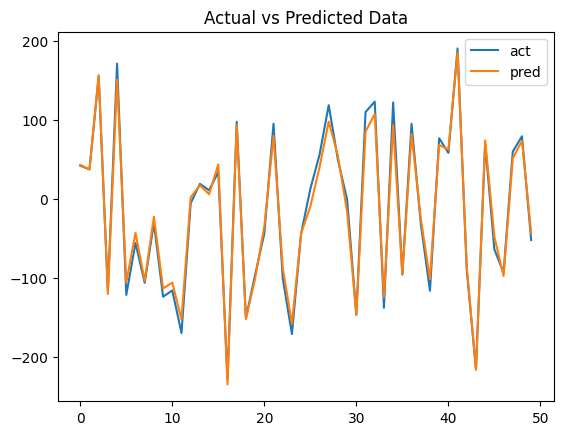

In [7]:
num_samples = 50
num_features = 3
num_classes = 2
gen = DataGenerator(num_samples, num_features, num_classes)
X, y = gen.get_data("regression")

num_samples, num_features = X.shape

w = np.random.rand(num_features)
b = np.random.randint(0,10)/10

lr = 0.01
max_iter = 1000
mse_log = []
for iter in range(max_iter):
    y_predict = np.dot(X,w) + b
    error = y_predict - y
    dw = (1/num_points) * np.dot(X.T, error)
    db = (1/num_points) * np.sum(error)
    w -= lr * dw

    mse = np.sum(error**2)/num_points # mean square error
    mse_log.append(mse)

plt.plot(mse_log)
plt.xlabel("iterations")
plt.ylabel("mse value")
plt.show()
print("Final mean square error:", mse)


plt.plot(y,label='act')
plt.plot(y_predict, label ='pred')
plt.title("Actual vs Predicted Data")
plt.legend()
plt.show()